In [1]:
import os
import sys
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('ggplot')
experiment_dir = os.path.dirname(os.getcwd()) #Replace this with your path to the mlpractical directory

In [2]:
experiment_dir

'd:\\Users\\pc\\Documents\\VscodeFiles\\mlpractical'

In [3]:
def collect_experiment_dicts(target_dir, test_flag=False):
    experiment_dicts = dict()
    for subdir, dir, files in os.walk(target_dir):
        for file in files:
            filepath = None
            if not test_flag:
                if file == 'summary.csv':
                    filepath = os.path.join(subdir, file)
            
            elif test_flag:
                if file == 'test_summary.csv':
                    filepath = os.path.join(subdir, file)
            
            if filepath is not None:
                
                with open(filepath, 'r') as read_file:
                    lines = read_file.readlines()
                    lines = [line for line in lines if line.strip()] # windows
                    
                current_experiment_dict = {key: [] for key in lines[0].replace('\n', '').split(',')}
                idx_to_key = {idx: key for idx, key in enumerate(lines[0].replace('\n', '').split(','))}
                
                for line in lines[1:]:
                    for idx, value in enumerate(line.replace('\n', '').split(',')):
                        try:
                            current_experiment_dict[idx_to_key[idx]].append(float(value))
                        except Exception as e:
                            print("dir", dir)
                            print("subdir", subdir)
                            print("files", files)
                            print("file", file)
                            print("filename", filepath)
                            print(lines[0])
                            print(lines[1])
                            print(lines[2])
                            # print("line", line)
                            print("idx and value", idx, value)
                            print(e)
                
                # windows
                experiment_dicts[subdir.split("\\")[-2]] = current_experiment_dict
                
    return experiment_dicts
                
            

In [4]:
result_dict = collect_experiment_dicts(target_dir=experiment_dir)
for key, value in result_dict.items():
    print(key, list(value.keys()))

VGG_08 ['train_acc', 'train_loss', 'val_acc', 'val_loss']
VGG_08_experiment ['train_acc', 'train_loss', 'val_acc', 'val_loss']
VGG_38 ['train_acc', 'train_loss', 'val_acc', 'val_loss']
VGG_38_BN_1e-3_experiment ['train_acc', 'train_loss', 'val_acc', 'val_loss']
VGG_38_BN_RC_1e-2 ['train_acc', 'train_loss', 'val_acc', 'val_loss']
VGG_38_BN_RC_1e-2_experiment ['train_acc', 'train_loss', 'val_acc', 'val_loss']
VGG_38_experiment ['train_acc', 'train_loss', 'val_acc', 'val_loss']


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def plot_result_graphs(plot_name, stats, keys_to_plot, notebook=True):
    
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for name in keys_to_plot:
        for k in ['train_loss', 'val_loss']:
            item = stats[name][k]
            ax_1.plot(np.arange(0, len(item)), 
                      item, label='{}_{}'.format(name, k))
            
    ax_1.legend(loc=0)
    ax_1.set_ylabel('Loss')
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for name in keys_to_plot:
        for k in ['train_acc', 'val_acc']:
            item = stats[name][k]
            ax_2.plot(np.arange(0, len(item)), 
                      item, label='{}_{}'.format(name, k))
            
    ax_2.legend(loc=0)
    ax_2.set_ylabel('Accuracy')
    ax_2.set_xlabel('Epoch number')
    
    # papertype=None, frameon=None DELETE
    fig_1.savefig('../data/{}_loss_performance.pdf'.format(plot_name), dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', format='pdf',
        transparent=False, bbox_inches=None, 
        pad_inches=0.1, metadata=None)
    
    # papertype=None, frameon=None
    fig_2.savefig('../data/{}_accuracy_performance.pdf'.format(plot_name), dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', format='pdf',
        transparent=False, bbox_inches=None, 
        pad_inches=0.1, metadata=None)
    
        # Display the plot if running in a notebook
    if notebook:
        plt.show()
    
    

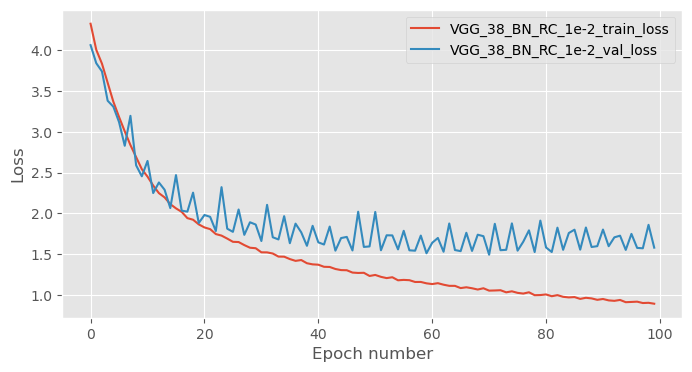

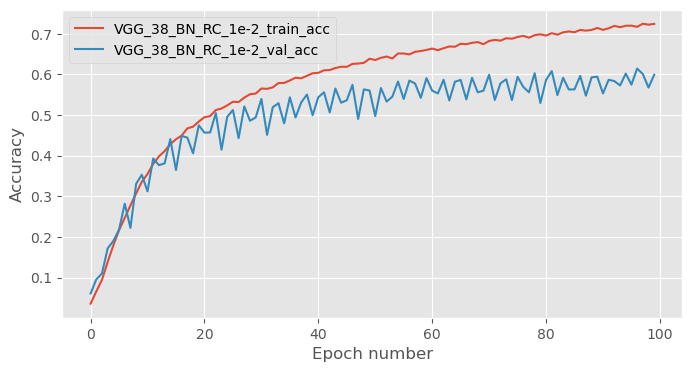

In [6]:
plot_result_graphs('problem_model', result_dict, keys_to_plot=['VGG_38_BN_RC_1e-2'])

In [7]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')

def plot_result_graphs(plot_name, stats, keys_to_plot, notebook=True):
    # Create a figure and a primary axis
    fig, ax1 = plt.subplots(figsize=(8, 4))
    
    # Create a secondary Y-axis
    ax2 = ax1.twinx()

    # Retrieve the default color cycle
    color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

    # Plot train_loss and val_loss on the left Y-axis (use first two colors)
    for name in keys_to_plot:
        ax1.plot(np.arange(0, len(stats[name]['train_loss'])), 
                 stats[name]['train_loss'], 
                 label='{}_train_loss'.format(name),
                 color=color_cycle[0])
        ax1.plot(np.arange(0, len(stats[name]['val_loss'])), 
                 stats[name]['val_loss'], 
                 label='{}_val_loss'.format(name),
                 color=color_cycle[1])

    # Plot train_acc and val_acc on the right Y-axis (use third and fourth colors)
    for name in keys_to_plot:
        ax2.plot(np.arange(0, len(stats[name]['train_acc'])), 
                 stats[name]['train_acc'], 
                 label='{}_train_acc'.format(name),
                 color=color_cycle[2])
        ax2.plot(np.arange(0, len(stats[name]['val_acc'])), 
                 stats[name]['val_acc'], 
                 label='{}_val_acc'.format(name),
                 color=color_cycle[3])

    # Add legends for both axes
    # Get handles and labels from both axes
    handles_ax1, labels_ax1 = ax1.get_legend_handles_labels()
    handles_ax2, labels_ax2 = ax2.get_legend_handles_labels()

    # Combine handles and labels
    handles = handles_ax1 + handles_ax2
    labels = labels_ax1 + labels_ax2

    # Add a combined legend to the figure
    ax1.legend(handles, labels, loc='center right')

    # Add labels and title
    ax1.set_xlabel('Epoch number')
    ax1.set_ylabel('Loss')
    ax2.set_ylabel('Accuracy')
    ax1.set_title('Loss and Accuracy over Epochs')

    # Save the combined plot
    fig.savefig('../data/{}_combined_performance_dual_axis.pdf'.format(plot_name), dpi=None, facecolor='w', edgecolor='w',
                orientation='portrait', format='pdf',
                transparent=False, bbox_inches=None, 
                pad_inches=0.1, metadata=None)

    # Display the plot if running in a notebook
    if notebook:
        plt.show()


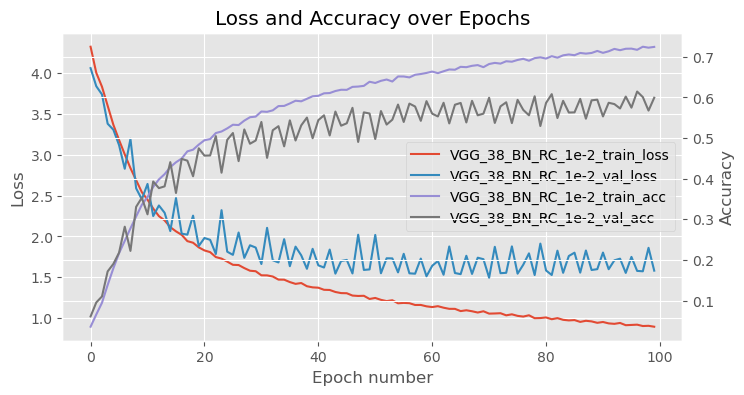

In [8]:
plot_result_graphs('problem_model', result_dict, keys_to_plot=['VGG_38_BN_RC_1e-2'])

In [9]:
'VGG_38_BN_RC_1e-2_experiment'

'VGG_38_BN_RC_1e-2_experiment'